<a href="https://colab.research.google.com/github/nilnida/DSA210-Term-Project/blob/main/machine_learning_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Linear Regression Model Implementation to Predict Temperature

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")
df = df[["Time (secs)","Battery capacity (Ahr) for discharge till 2.7V","RUL","Battery temperature (°C)"]].dropna()

X = df[["Time (secs)","Battery capacity (Ahr) for discharge till 2.7V","RUL"]]
y = df["Battery temperature (°C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE (Root Mean Squared Error): 0.25
R² Score: 0.88


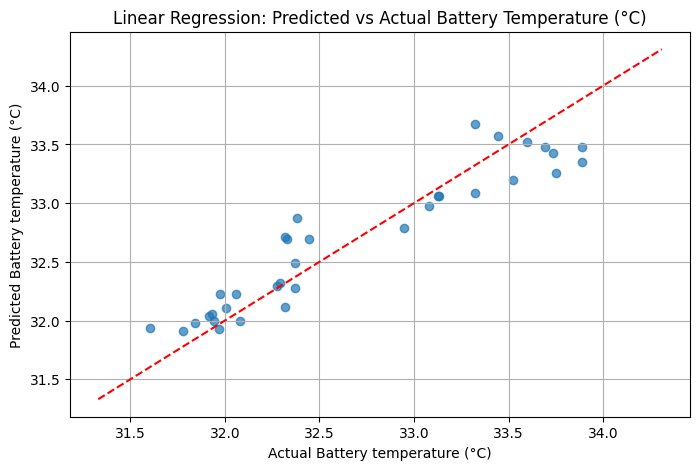

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Battery temperature (°C)")
plt.ylabel("Predicted Battery temperature (°C)")
plt.title("Linear Regression: Predicted vs Actual Battery Temperature (°C)")
plt.grid(True)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

<Figure size 600x500 with 0 Axes>

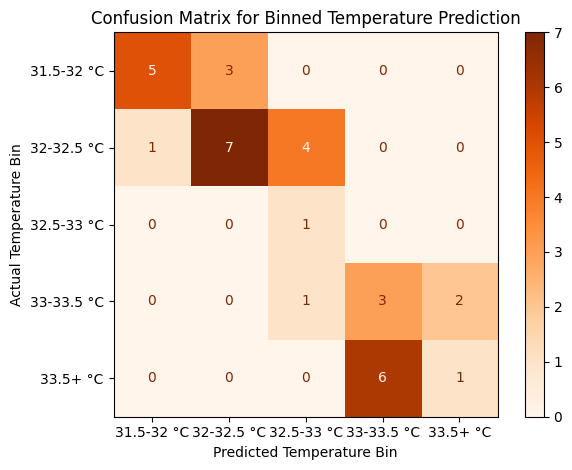

In [ ]:
# Confusion matrix
temp_bins = [31.5, 32, 32.5, 33, 33.5, np.inf]
bin_labels = ["31.5-32 °C", "32-32.5 °C", "32.5-33 °C", "33-33.5 °C", "33.5+ °C"]

y_test_binned = pd.cut(y_test, bins=temp_bins, labels=bin_labels)
y_pred_binned = pd.cut(y_pred, bins=temp_bins, labels=bin_labels)

cm = confusion_matrix(y_test_binned, y_pred_binned, labels=bin_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bin_labels)

plt.figure(figsize=(6, 5))
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix for Binned Temperature Prediction")
plt.xlabel("Predicted Temperature Bin")
plt.ylabel("Actual Temperature Bin")
plt.grid(False)
plt.tight_layout()
plt.show()